# Decentralized Cyber-security with CYBRIA: Federated Learning for Privacy-Preserving Cyber Threat Detection

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
import joblib
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

## Data Analysis

In [2]:
data = pd.read_csv(r"/Users/surupradeep/Documents/miniproject/A11 Cyber threat/Datasets/BoTNeTIoT-L01-v2.csv")

In [3]:
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1


In [4]:
data.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


In [5]:
data.tail()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
7062601,2.937269,217.763487,17706.82364,2.937269,217.763487,17706.82364,1.220882,60.000000,9.540000e-07,84.852814,...,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062602,1.730254,282.630543,10545.88790,1.730254,282.630543,10545.88790,1.213342,330.000000,5.390000e-06,431.490440,...,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062603,2.730251,299.980395,7204.11662,2.730251,299.980395,7204.11662,1.213352,330.000000,6.610000e-06,431.490440,...,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062604,2.882414,216.723647,17753.08315,2.882414,216.723647,17753.08315,1.209274,60.000000,6.740000e-07,84.852814,...,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062605,2.032574,154.377267,13032.48760,2.032574,154.377267,13032.48760,1.299681,145.339354,1.010891e+02,195.783485,...,145.339354,1.010891e+02,195.783485,1.218303e+04,1.917443e+03,2.328946e-01,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1


In [6]:
data.describe()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
count,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,...,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06
mean,3.400682e+03,1.794441e+02,1.931062e+04,3.400682e+03,1.794441e+02,1.931066e+04,1.892359e+03,1.792406e+02,4.415659e+00,1.865562e+02,...,7.497349e+08,1.114786e+16,1.369083e+02,1.792334e+02,1.912623e+00,1.842961e+02,9.254144e+02,9.101316e+01,1.845142e-03,7.871485e-02
std,2.897012e+03,1.537109e+02,2.636844e+04,2.897012e+03,1.537107e+02,2.636842e+04,2.523083e+03,2.059018e+02,2.243629e+01,2.067658e+02,...,7.459028e+08,7.282259e+16,6.510637e+02,2.061473e+02,2.013019e+01,2.077680e+02,1.463365e+04,1.976009e+03,5.208508e-02,2.692932e-01
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,...,2.484468e-03,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-1.312975e+05,-1.586467e+00,0.000000e+00
25%,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,...,4.041758e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.644882e+03,7.412707e+01,9.807711e+01,3.644882e+03,7.412707e+01,9.810144e+01,1.071281e+00,7.020764e+01,0.000000e+00,7.399665e+01,...,6.745729e+08,1.501619e-03,1.000000e+00,6.600001e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.354692e+03,3.486463e+02,4.887076e+04,6.354692e+03,3.486463e+02,4.887076e+04,4.201684e+03,9.314709e+01,3.293467e+00,1.344109e+02,...,1.505914e+09,6.062294e+10,1.000000e+00,9.800000e+01,0.000000e+00,1.370625e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.946997e+03,1.401994e+03,4.520011e+05,8.946997e+03,1.401994e+03,4.520011e+05,7.944987e+03,1.470000e+03,6.784580e+02,1.470000e+03,...,1.534253e+09,5.880000e+17,4.594455e+03,1.470000e+03,6.863705e+02,1.470000e+03,5.014297e+05,1.406094e+05,2.760701e+00,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MI_dir_L0.1_weight    float64
 1   MI_dir_L0.1_mean      float64
 2   MI_dir_L0.1_variance  float64
 3   H_L0.1_weight         float64
 4   H_L0.1_mean           float64
 5   H_L0.1_variance       float64
 6   HH_L0.1_weight        float64
 7   HH_L0.1_mean          float64
 8   HH_L0.1_std           float64
 9   HH_L0.1_magnitude     float64
 10  HH_L0.1_radius        float64
 11  HH_L0.1_covariance    float64
 12  HH_L0.1_pcc           float64
 13  HH_jit_L0.1_weight    float64
 14  HH_jit_L0.1_mean      float64
 15  HH_jit_L0.1_variance  float64
 16  HpHp_L0.1_weight      float64
 17  HpHp_L0.1_mean        float64
 18  HpHp_L0.1_std         float64
 19  HpHp_L0.1_magnitude   float64
 20  HpHp_L0.1_radius      float64
 21  HpHp_L0.1_covariance  float64
 22  HpHp_L0.1_pcc         float64
 23  Device_

In [8]:
data['Attack'].unique()   #it  refers to a value that appears only once or a distinct value within a specific dataset or column of a dataset

array(['gafgyt', 'mirai', 'Normal'], dtype=object)

## Data preprocessing

In [9]:
data.isnull().sum()

MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        0
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            0
HH_L0.1_std             0
HH_L0.1_magnitude       0
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
Device_Name             0
Attack                  0
Attack_subType          0
label                   0
dtype: int64

In [10]:
data.shape

(7062606, 27)

### Heatmap

In [11]:
labels = set(data['Attack'])
labels

{'Normal', 'gafgyt', 'mirai'}

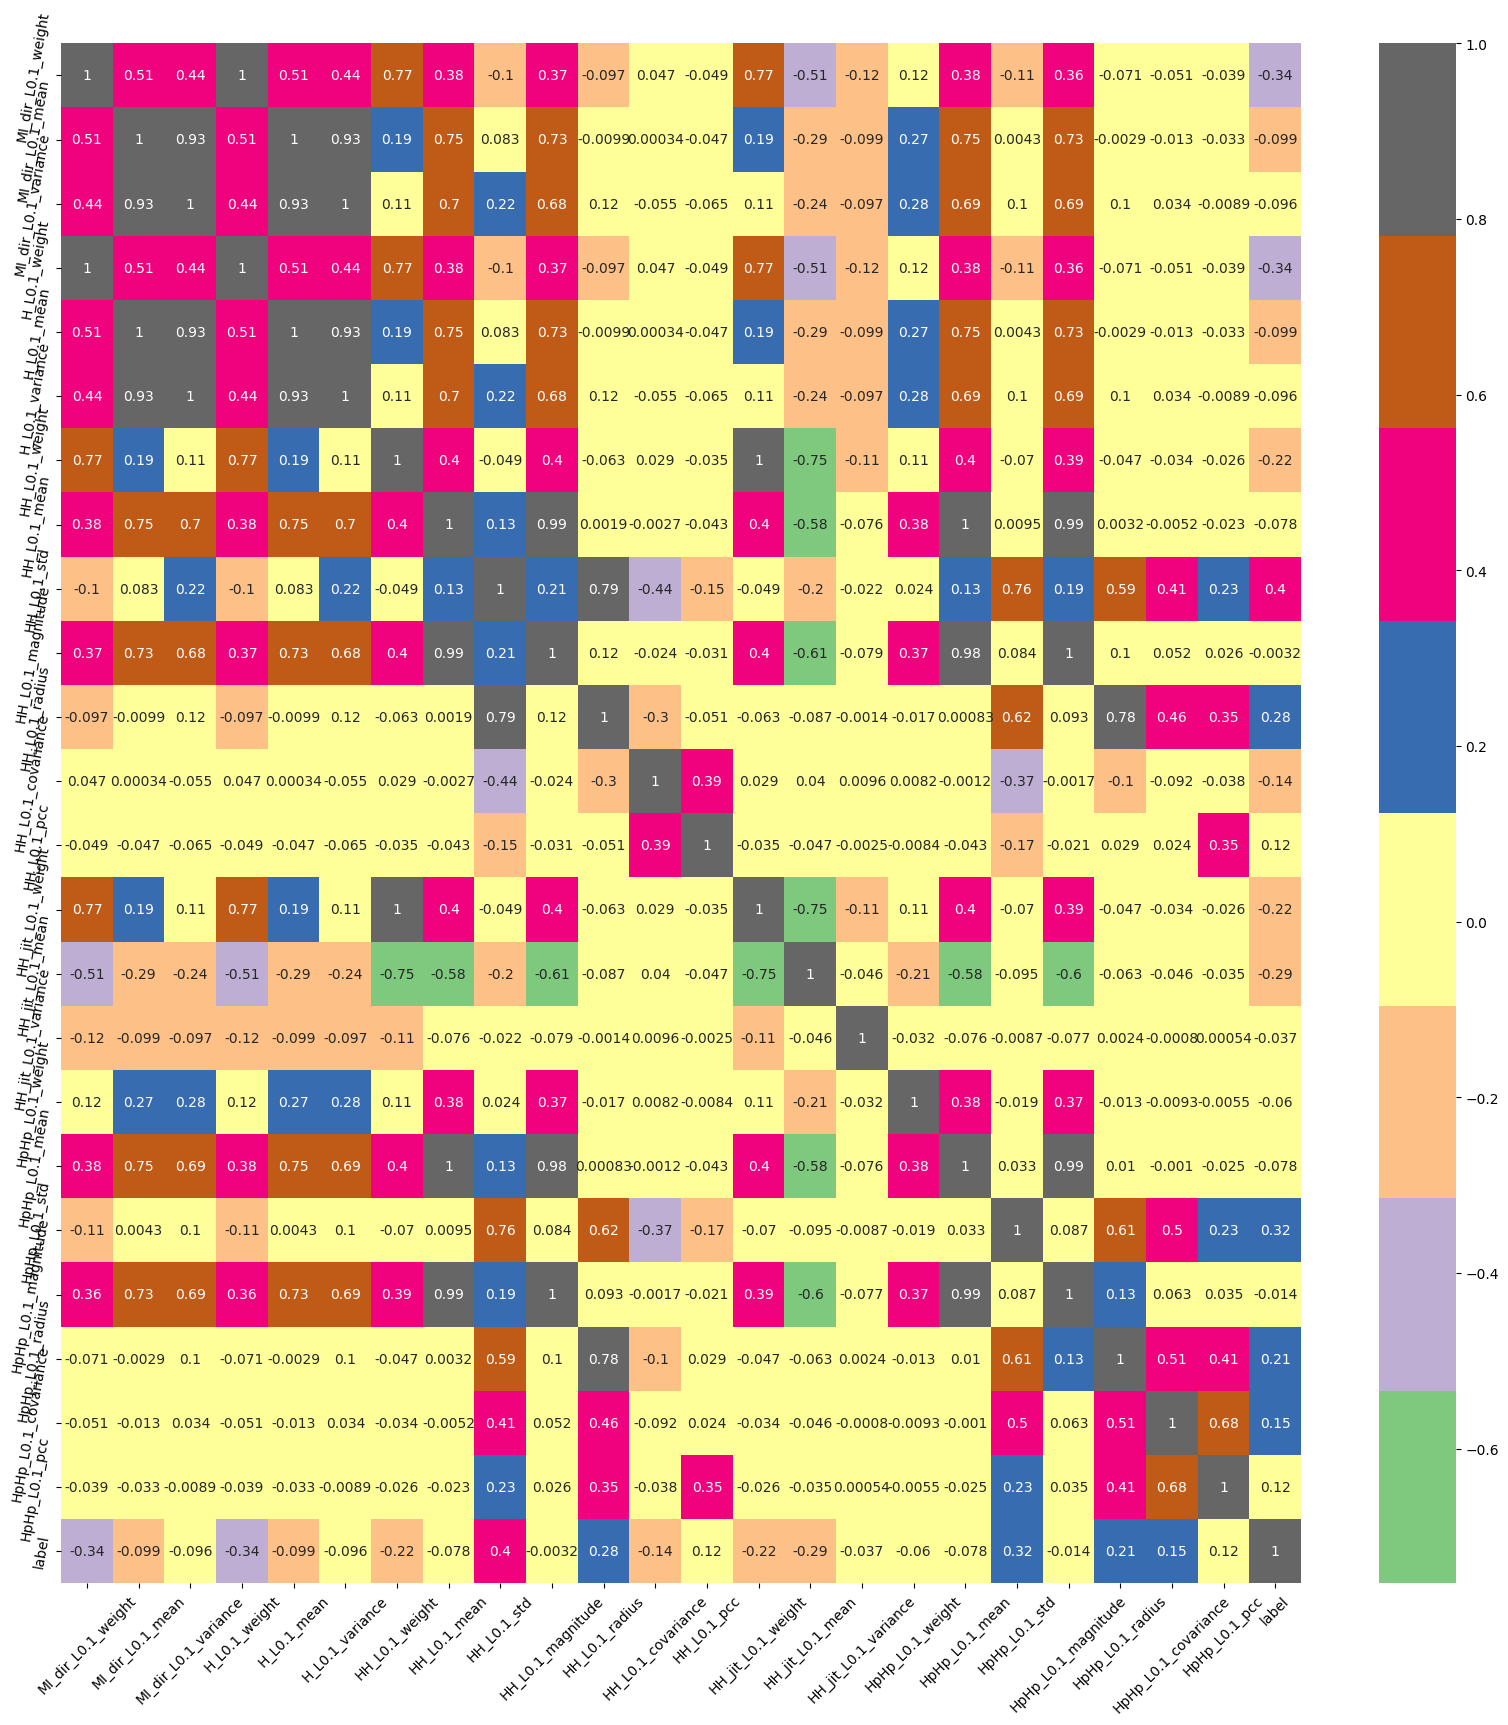

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap = 'Accent',annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 80)
plt.show()

In [13]:
labels = ['Normal', 'BASHLITE', 'Mirai']
labels

['Normal', 'BASHLITE', 'Mirai']

In [14]:
columns = ['Device_Name','Attack_subType']
data = data.drop(columns = columns)

In [15]:
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,gafgyt,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,Normal,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,Normal,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,Normal,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,Normal,1


In [16]:
Labels = ['Attack']

for i in Labels:
    data[i] = LabelEncoder().fit_transform(data[i])
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,1,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,1,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,0,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,0,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,0,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,0,1


### countplot

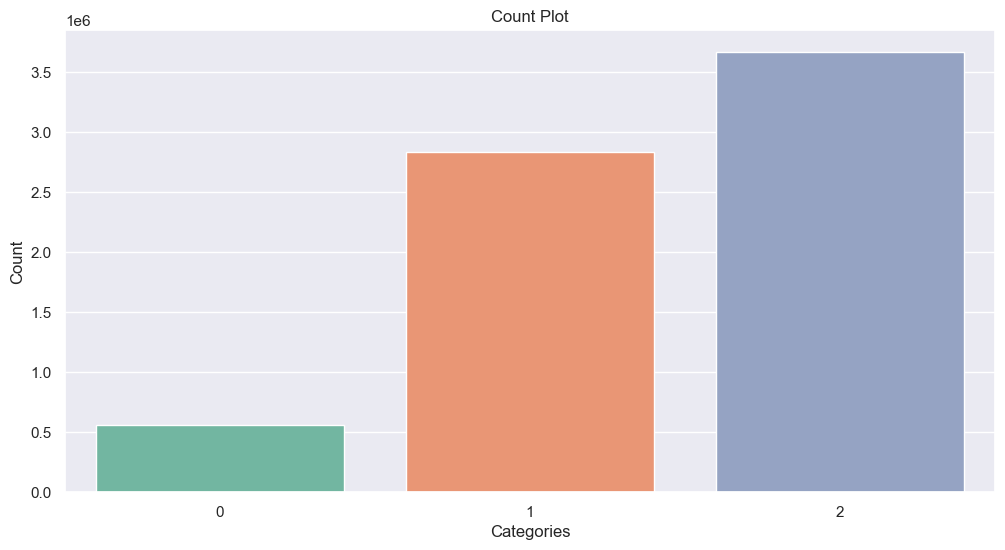

In [17]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=data['Attack'], palette="Set2")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.show()

In [18]:
x = data.drop(['Attack'], axis = 1)
x

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,1.505914e+09,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,7.263102e+08,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,1.505914e+09,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,1.505914e+09,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,7.529571e+08,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,2.467063e+01,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,2.507751e+01,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,2.507690e+01,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,2.531063e+01,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,1


In [20]:
y = data['Attack']
y

0          1
1          1
2          1
3          1
4          1
          ..
7062601    0
7062602    0
7062603    0
7062604    0
7062605    0
Name: Attack, Length: 7062606, dtype: int64

## Splitting the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [ ]:
y_train

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train.shape

In [ ]:
x_train.shape

## Performance Evaluation

In [ ]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## BernoulliNBClassifier Algorithm

In [ ]:
if os.path.exists('BernoulliNBClassifier.pkl'):
    # Load the Bernoulli Naive Bayes Classifier model
    bnb_classifier = joblib.load('BernoulliNBClassifier.pkl')
    predict = bnb_classifier.predict(x_test)
else:                       
    # Train and save the Bernoulli Naive Bayes Classifier model
    bnb_classifier = BernoulliNB()
    bnb_classifier.fit(x_train, y_train)
    joblib.dump(bnb_classifier, 'BernoulliNBClassifier.pkl')


# Predict using the trained Bernoulli Naive Bayes Classifier model
y_pred_bnb = bnb_classifier.predict(x_test)

# Evaluate the Bernoulli Naive Bayes Classifier model
performance_metrics('BernoulliNBClassifier', y_pred_bnb, y_test)

## RandomForestClassifier

In [ ]:
if os.path.exists('RandomForest_weights.pkl'):
    # Load the model from the pkl file
    classifier = joblib.load('RandomForest_weights.pkl')
else:
    # Train the classifier on the training data
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'RandomForest_weights.pkl')
    print("RandomForest classifier model trained and model weights saved.")
    
y_pred = classifier.predict(x_test)
performance_metrics("RandomForest Classifier", y_pred, y_test)

In [ ]:
test = pd.read_csv(r"/Users/surupradeep/Documents/miniproject/A11 Cyber threat/Datasets/test.csv")
test

In [ ]:
test.info()

In [ ]:
columns = ['Device_Name','Attack_subType']
test = test.drop(columns = columns)

In [ ]:
test

In [ ]:
predict = classifier.predict(test)
predict

In [ ]:
A='Normal'
B='BASHLITE'
c='mirai'
#test = pd.read_csv((r"test.csv")
predict = classifier.predict(test)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(test.iloc[i,:],A))
    elif predict[i] == 1:
        print("{} {} ".format(test.iloc[i,:],B))
    elif predict[i]== 2:
        print("{} :{} ".format(test.iloc[i, :],c))